In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import pickle
import time

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,RandomForestRegressor
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
with open('pickles/df_description.pkl', 'rb') as f:
    df_description = pickle.load(f)
    
with open('pickles/df_model.pkl', 'rb') as f:
    df_model = pickle.load(f)

In [3]:
df_description

,SOURCE_REPORTING_UNIT_NAME,FIRE_YEAR,DISCOVERY_DOY,FIRE_SIZE,LATITUDE,LONGITUDE,STATE,duration,STAT_CAUSE_DESCR
0,Plumas National Forest,2005,33,0.10,40.036944,-121.005833,CA,0.0,Miscellaneous
1,Eldorado National Forest,2004,133,0.25,38.933056,-120.404444,CA,0.0,Lightning
2,Eldorado National Forest,2004,152,0.10,38.984167,-120.735556,CA,0.0,Debris Burning
3,Eldorado National Forest,2004,180,0.10,38.559167,-119.913333,CA,5.0,Lightning
4,Eldorado National Forest,2004,180,0.10,38.559167,-119.933056,CA,5.0,Lightning
...,...,...,...,...,...,...,...,...,...
1880456,Tehama-Glenn Unit,2015,165,2.22,40.019907,-122.391398,CA,0.0,Missing/Undefined
1880457,Shasta-Trinity Unit,2015,273,1.00,40.588583,-123.069617,CA,1.0,Arson
1880458,Humboldt-Del Norte Unit,2015,213,4.00,40.244833,-123.544167,CA,5.0,Lightning
1880459,Sonoma-Lake Napa Unit,2015,148,0.50,38.415608,-122.660044,CA,0.0,Miscellaneous


### Dummifying Columns

In [4]:
categorical = ['STAT_CAUSE_DESCR',
               'STATE','SOURCE_SYSTEM_TYPE']
numeric = ['DISCOVERY_DOY','duration']

In [5]:
df_dum = pd.get_dummies(df_model[categorical],drop_first= True)
df_num = df_model[numeric]

In [6]:
df = pd.concat([df_num,df_dum],axis=1)
df

,DISCOVERY_DOY,duration,STAT_CAUSE_DESCR_Campfire,STAT_CAUSE_DESCR_Children,STAT_CAUSE_DESCR_Debris Burning,STAT_CAUSE_DESCR_Equipment Use,STAT_CAUSE_DESCR_Fireworks,STAT_CAUSE_DESCR_Lightning,STAT_CAUSE_DESCR_Miscellaneous,STAT_CAUSE_DESCR_Missing/Undefined,...,STATE_TX,STATE_UT,STATE_VA,STATE_VT,STATE_WA,STATE_WI,STATE_WV,STATE_WY,SOURCE_SYSTEM_TYPE_INTERAGCY,SOURCE_SYSTEM_TYPE_NONFED
0,33,0.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,133,0.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,152,0.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,180,5.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,180,5.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880456,165,0.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1880457,273,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1880458,213,5.0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1880459,148,0.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


### Model Selection

We'll evaluate several models

In [7]:
X = df
y = df_model['FIRE_SIZE_CLASS']

In [8]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=2023)

#### Baseline Model

In [11]:
null_model = y.value_counts(normalize= True)
null_model

B    0.434500
A    0.426586
C    0.104777
D    0.015896
E    0.009117
F    0.005867
G    0.003257
Name: FIRE_SIZE_CLASS, dtype: float64

### Random Forest

In [12]:
model_rf = RandomForestClassifier()

In [13]:
model_rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [14]:
params_rf = {
    'n_estimators': 100,
    'max_depth': None,
    'min_samples_split': 2,
    'n_jobs': -1
}

In [15]:
#gs = GridSearchCV(model_rf,params_rf,cv=5)

In [16]:
#gs.fit(X_train,y_train)

In [17]:
best_params_rf = params_rf
best_params_rf

{'n_estimators': 100, 'max_depth': None, 'min_samples_split': 2, 'n_jobs': -1}

In [18]:
model_rf.set_params(**best_params_rf)

RandomForestClassifier(n_jobs=-1)

In [19]:
model_rf.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1)

In [20]:
y_pred_rf = model_rf.predict(X_test)
score_rf = model_rf.score(X_test,y_test)
score_rf

# accuracy_rf = model_rf.score(X_test, y_test)
# precision_rf = precision_score(y_test_rf, y_pred)
# recall_rf = recall_score(y_test, y_pred_rf)
# f1_rf = f1_score(y_test, y_pred_rf)

0.6020264223634516

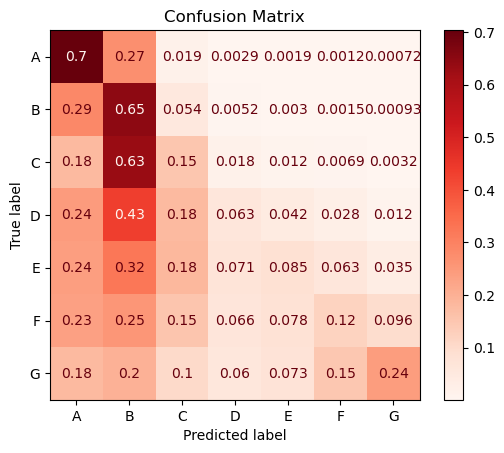

In [27]:
ConfusionMatrixDisplay.from_estimator(model_rf,X_test,y_test, cmap = 'Reds',normalize= 'true');
plt.title("Confusion Matrix");